In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

/var/folders/gp/n7ttdtg56pg0s6ydv9zj9wth0000gn/T/ipykernel_6257/4279424028.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Intoduction

Data source: https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task?resource=download

### What does this data frame contain?

Bank Client Data:
* **age** (numeric)
* **job** : Type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar", "self-employed","retired","technician","services")
* **marital** : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* **education** (categorical: "unknown","secondary","primary","tertiary")
* **default**: Has credit in default? (binary: "yes","no")
* **balance**: Average yearly balance, in euros (numeric)
* **housing**: Has housing loan? (binary: "yes","no")
* **loan**: Has personal loan? (binary: "yes","no")

Related with the Last Contact of the Current Campaign:
* **contact**: Contact communication type (categorical: "unknown","telephone","cellular")
* **day**: Last contact day of the month (numeric)
* **month**: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* **duration**: Last contact duration, in seconds (numeric)

Other Attributes:
* **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not
previously contacted)
* **previous**: Number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output Variable (Desired Target):
* **y** - Has the client subscribed to a term deposit? (binary: "yes","no")

# Data import

In [10]:
bank_data_df = pd.read_csv('datasource/bank_data.csv')

### Data split

In [11]:
X_model, X_validate, y_model, y_validate = train_test_split(
    bank_data_df[bank_data_df.columns.values[:-1]],
    bank_data_df[bank_data_df.columns.values[-1]],
    test_size=0.2,
    random_state=42,
)

In [12]:
pd.concat([X_model,y_model], axis=1).to_csv('datasource/bank_data_model.csv', index= False)
pd.concat([X_validate,y_validate], axis=1).to_csv('datasource/bank_data_validate.csv', index= False)

In [13]:
bank_data_df = pd.read_csv('datasource/bank_data_model.csv')

EDA
--------------------------

In [14]:
bank_data_df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,978,34,entrepreneur,divorced,tertiary,no,262,no,no,cellular,20,nov,371,1,-1,0,unknown,no
1,251,32,management,married,tertiary,no,2349,no,no,cellular,14,aug,134,5,-1,0,unknown,no
2,3139,34,technician,single,secondary,no,1076,no,no,cellular,8,aug,70,2,-1,0,unknown,no
3,1822,31,management,married,tertiary,no,156,no,no,cellular,13,aug,657,7,-1,0,unknown,yes
4,4445,46,blue-collar,married,primary,no,258,yes,no,unknown,27,may,217,1,-1,0,unknown,no


In [15]:
bank_data_df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,2260.941372,41.229812,1415.979535,15.962942,264.238108,2.832135,39.177268,0.543695
std,1297.009711,10.659083,2789.095311,8.240591,256.651228,3.230350,98.286998,1.728541
min,0.000000,19.000000,-1746.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,1142.750000,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2252.500000,39.000000,453.500000,16.000000,186.000000,2.000000,-1.000000,0.000000
75%,3379.750000,49.000000,1500.000000,21.000000,332.000000,3.000000,-1.000000,0.000000
max,4519.000000,87.000000,27359.000000,31.000000,2769.000000,50.000000,871.000000,25.000000


In [16]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3616 non-null   int64 
 1   age         3616 non-null   int64 
 2   job         3616 non-null   object
 3   marital     3616 non-null   object
 4   education   3616 non-null   object
 5   default     3616 non-null   object
 6   balance     3616 non-null   int64 
 7   housing     3616 non-null   object
 8   loan        3616 non-null   object
 9   contact     3616 non-null   object
 10  day         3616 non-null   int64 
 11  month       3616 non-null   object
 12  duration    3616 non-null   int64 
 13  campaign    3616 non-null   int64 
 14  pdays       3616 non-null   int64 
 15  previous    3616 non-null   int64 
 16  poutcome    3616 non-null   object
 17  y           3616 non-null   object
dtypes: int64(8), object(10)
memory usage: 508.6+ KB


What we can clearly see is that there are no null observations. 
We decided to save our target value's name into targe_value variable.

In [17]:
target_value = 'y'

Analysis of numeric values
--------------------------

### Distribution

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

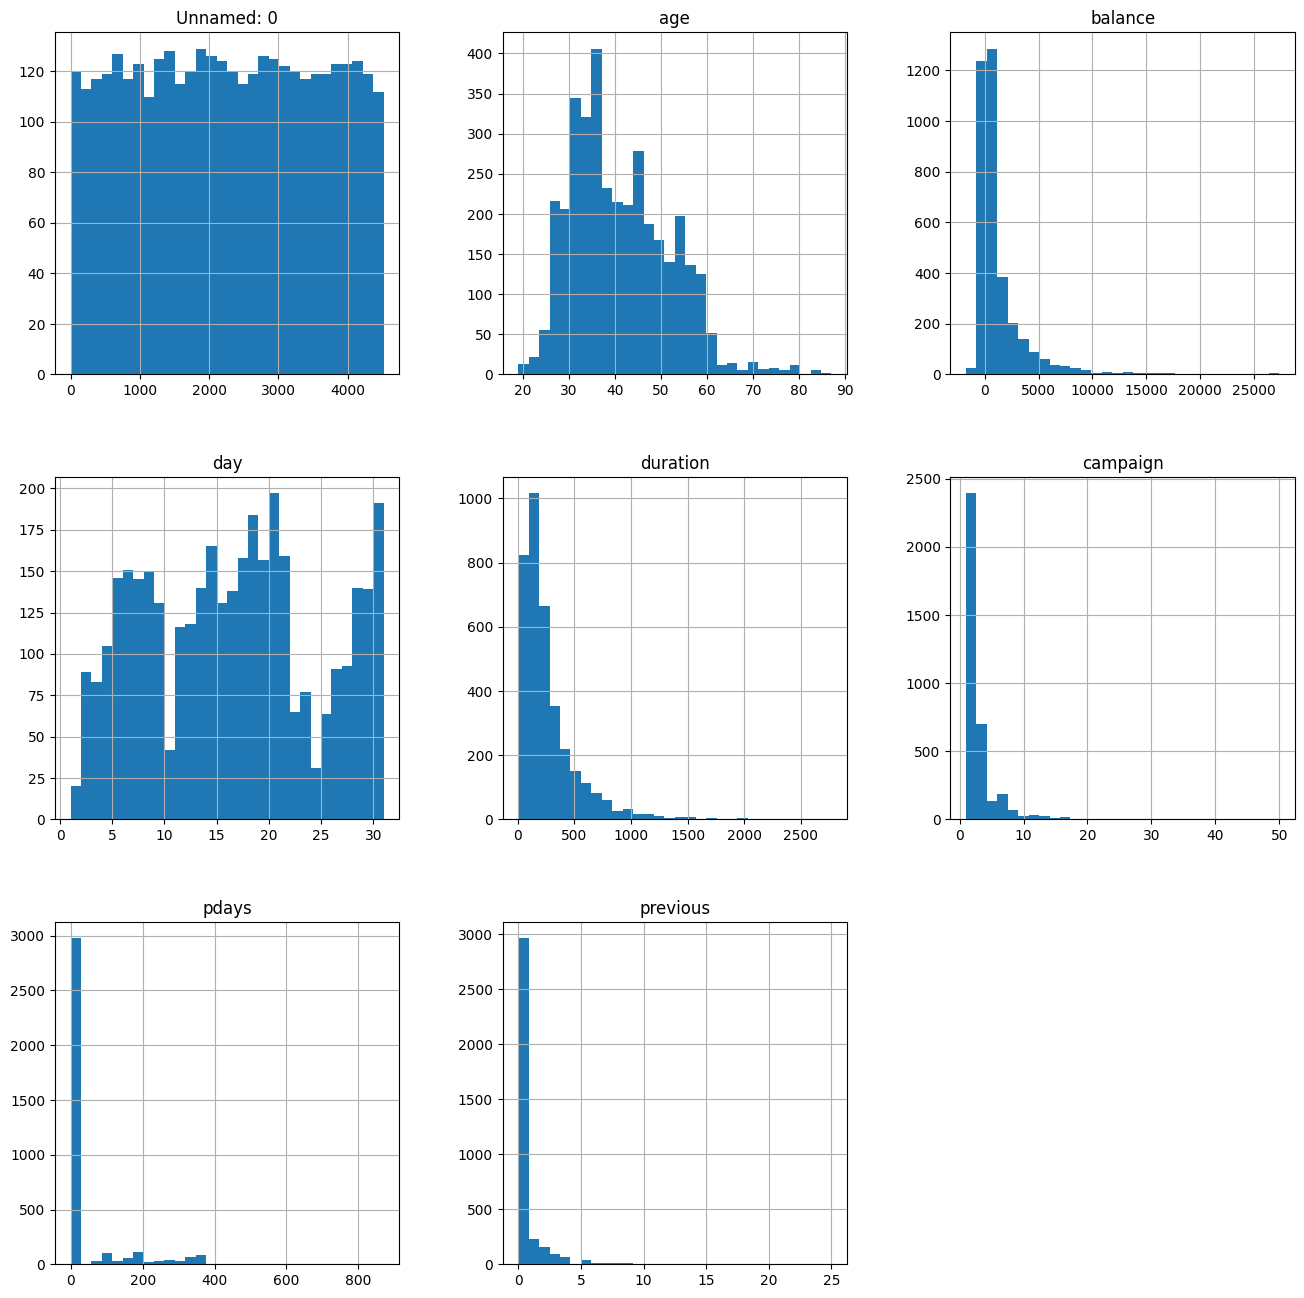

In [18]:
bank_data_df.hist(bins= 30, figsize=(16,16))

We found that one value contains just rows' indexes, so we decided to delete it 

In [19]:
bank_data_df = bank_data_df.iloc[:,1:]

In [20]:
numeric_values = bank_data_df.select_dtypes(include=np.number).columns.values
print(numeric_values)
print(len(numeric_values))

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
7


In [24]:
bank_data_df[numeric_values].head()

,age,balance,day,duration,campaign,pdays,previous
0,34,262,20,371,1,-1,0
1,32,2349,14,134,5,-1,0
2,34,1076,8,70,2,-1,0
3,31,156,13,657,7,-1,0
4,46,258,27,217,1,-1,0


### Are there some obvious corellations beetween target and features?

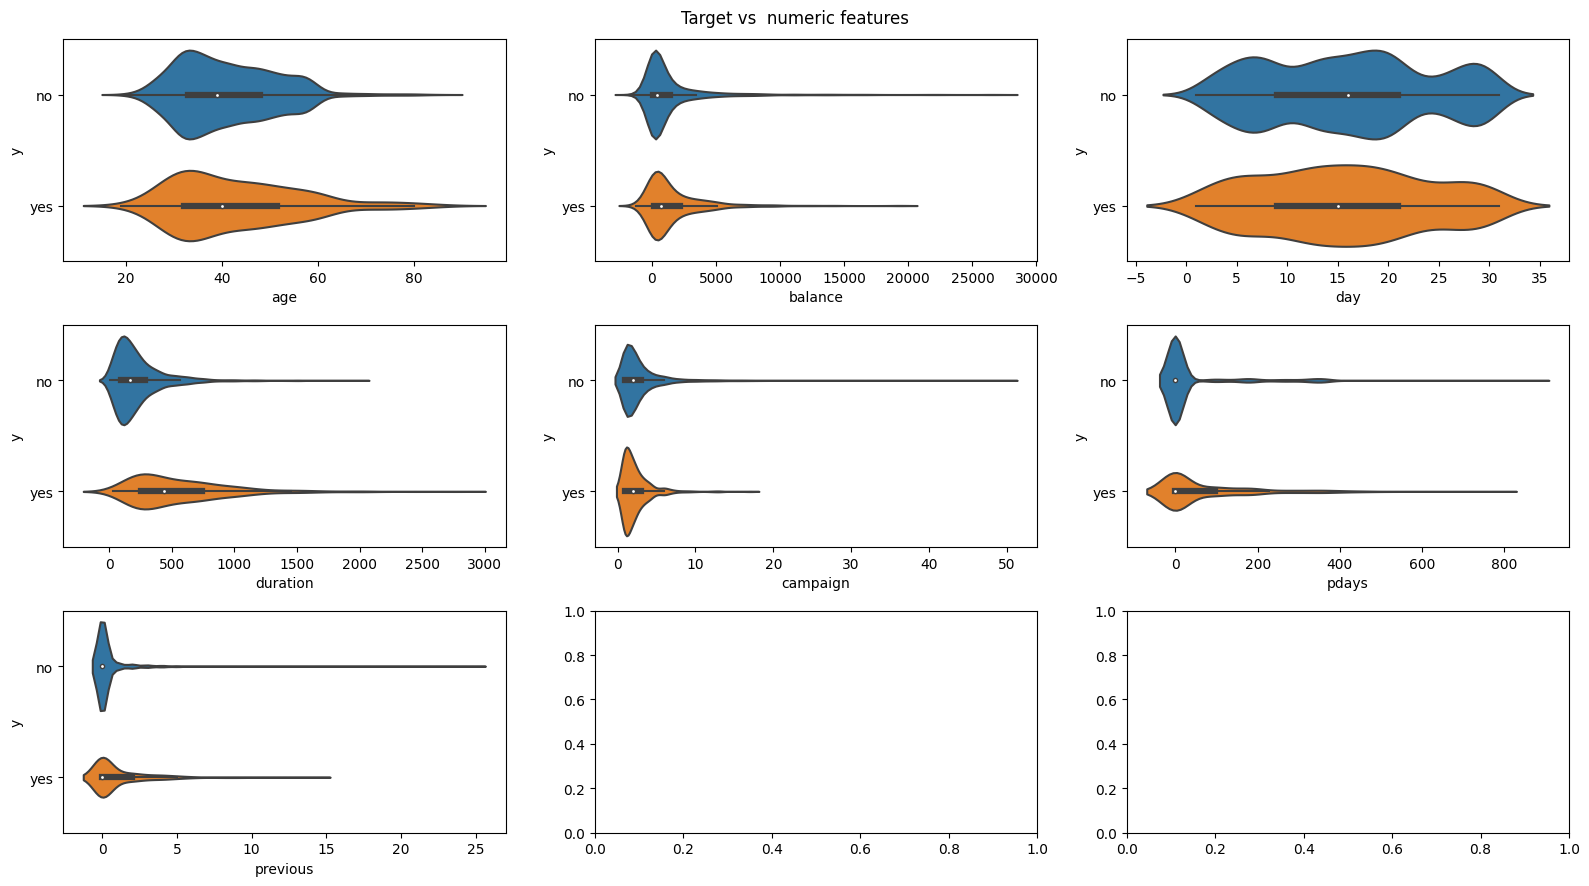

In [25]:
fig, axs = plt.subplots(3,3,figsize = (16,9))
axs = axs.flatten()
for i, col in enumerate(bank_data_df[numeric_values].columns):
    sns.violinplot(data=bank_data_df, x = col, y = target_value, ax = axs[i])

plt.suptitle("Target vs  numeric features")
plt.tight_layout()

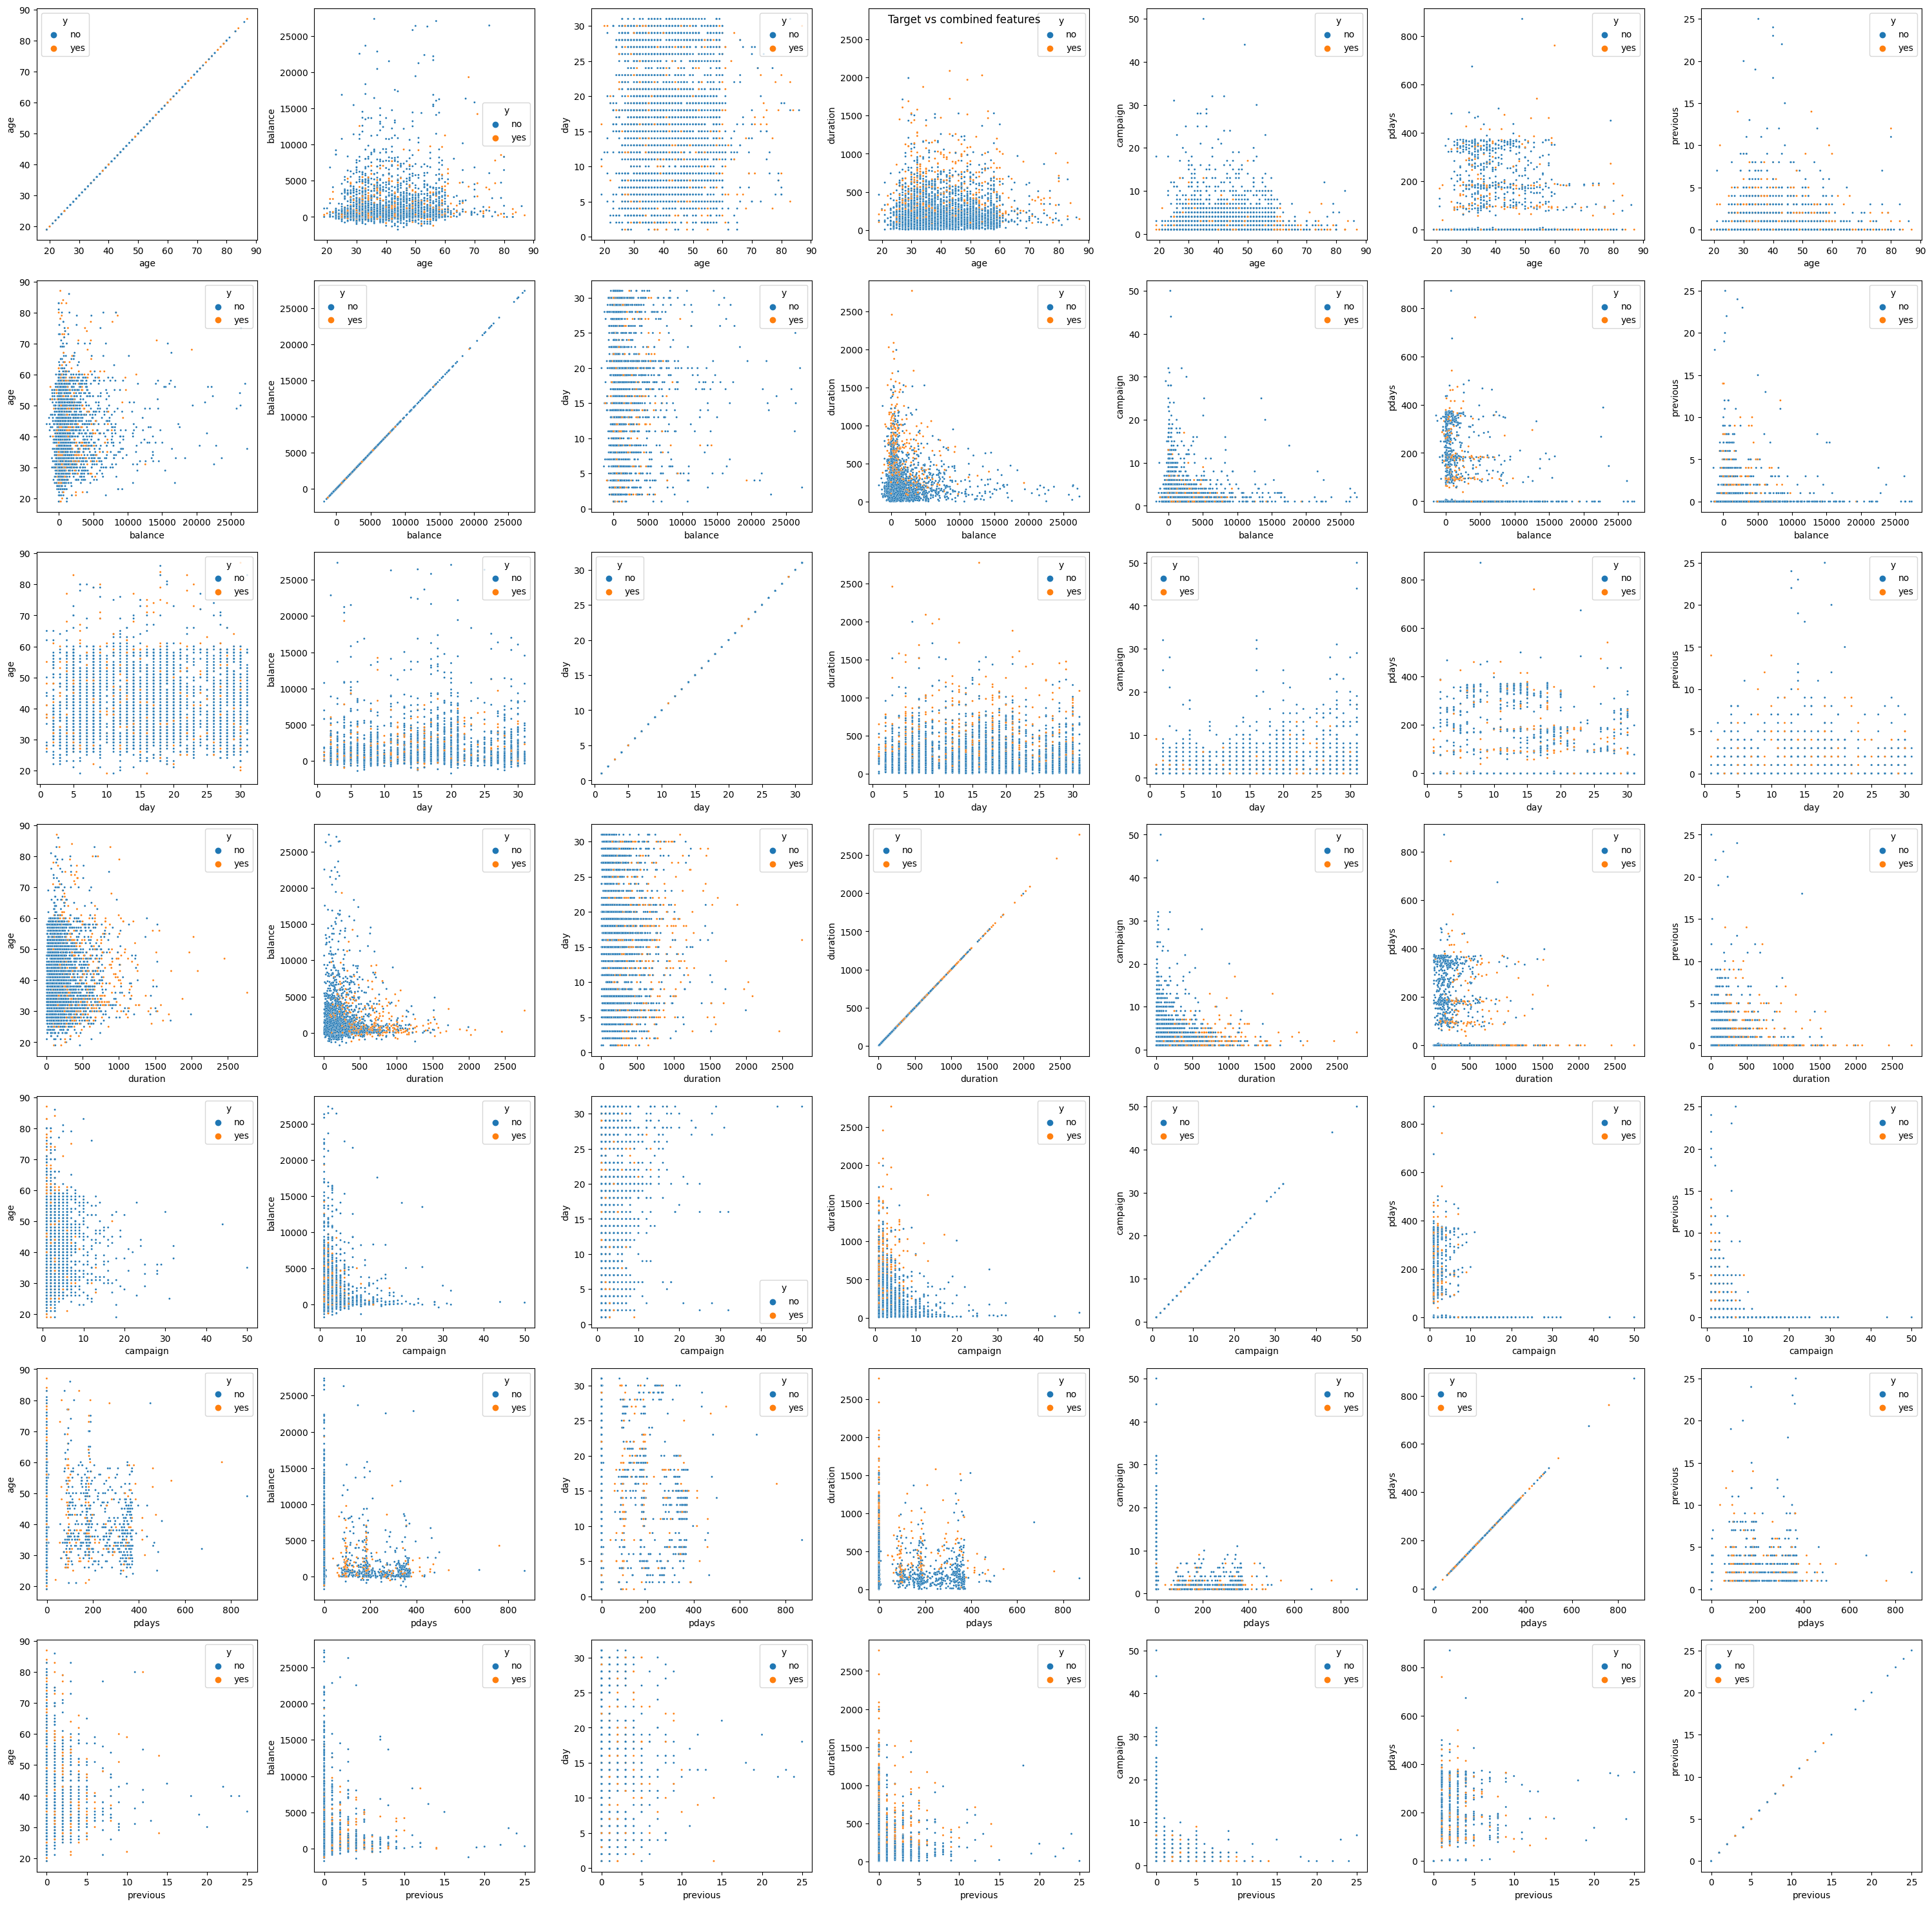

In [26]:
fig, axs = plt.subplots(len(numeric_values),len(numeric_values),figsize = (30,30))
for i, col1 in enumerate(bank_data_df[numeric_values].columns):
    for j, col2 in enumerate(bank_data_df[numeric_values].columns):
        sns.scatterplot(data= bank_data_df, x = col1, y= col2, hue = target_value, s = 5, ax = axs[i,j])

plt.suptitle("Target vs combined features")
plt.tight_layout()

<Axes: >

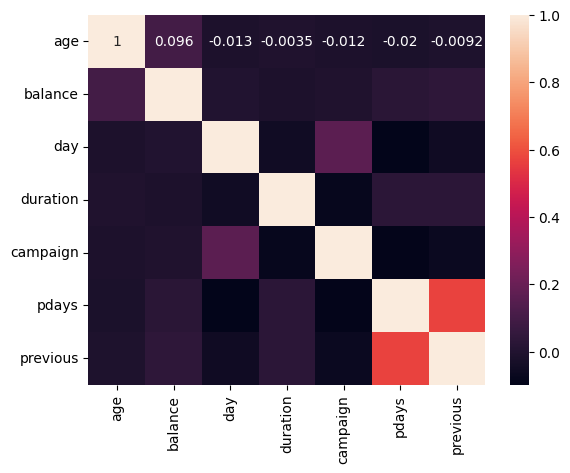

In [28]:
sns.heatmap(bank_data_df[numeric_values].corr(), annot= True)

# Analisys of non numeric values

In [30]:
non_numeric_values = bank_data_df.drop(columns=numeric_values).columns.values

In [31]:
non_numeric_values = non_numeric_values[:-1]
non_numeric_values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], dtype=object)

#### We see that we have some datetime values describing observations. Let's see if and how it affects target value

In [54]:
time_df = bank_data_df.groupby(['month', 'day','y'], as_index= False).size()

In [55]:
import calendar
month_num_dict = {month.lower(): index for index, month in enumerate(calendar.month_abbr) if month}

In [56]:
time_df['month'] = time_df['month'].map(month_num_dict)

In [57]:
time_df.head()

,month,day,y,size
0,4,1,no,1
1,4,2,no,2
2,4,2,yes,1
3,4,3,no,3
4,4,3,yes,1


In [89]:
time_df['day-month'] = time_df['day'].astype(str) + np.repeat("-",len(time_df))  + time_df['month'].astype(str)
time_df = time_df.sort_values(by = ['month','day'])

In [90]:
time_df.head()

,month,day,y,size,day-month
137,1,7,no,1,7-1
138,1,11,yes,1,11-1
139,1,12,no,1,12-1
140,1,12,yes,1,12-1
141,1,14,yes,2,14-1


In [91]:
time_df.describe()

,month,day,size
count,403.000000,403.000000,403.000000
mean,6.419355,15.677419,8.972705
std,3.002540,8.553906,14.563525
min,1.000000,1.000000,1.000000
25%,4.000000,8.000000,1.000000
50%,6.000000,16.000000,2.000000
75%,9.000000,23.000000,6.000000
max,12.000000,31.000000,78.000000


In [1]:
plt.subplots(1,1,figsize=(30,10))
sns.barplot(data= time_df, x='day-month', y='size', hue="y")
sns.lineplot(data= time_df, x= 'day-month', y = 'size')
ax.tick_params(axis='x', rotation=90)

NameError: name 'plt' is not defined

In [67]:
only_months_df = bank_data_df.groupby(["month", "y"], as_index= False).size()

In [68]:
only_months_df.head()

,month,y,size
0,apr,no,187
1,apr,yes,48
2,aug,no,449
3,aug,yes,61
4,dec,no,10


<Axes: xlabel='month', ylabel='size'>

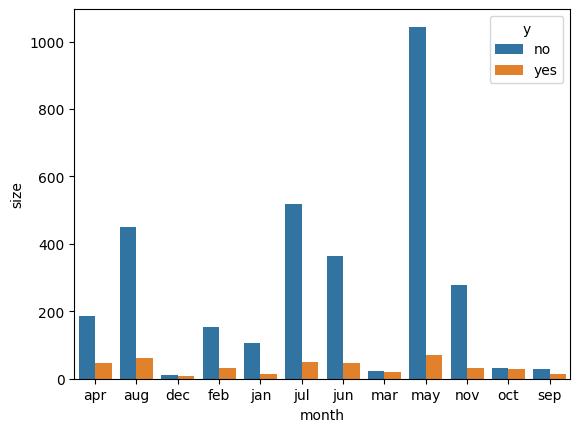

In [72]:
sns.barplot(data= only_months_df, x='month', y='size', hue="y")

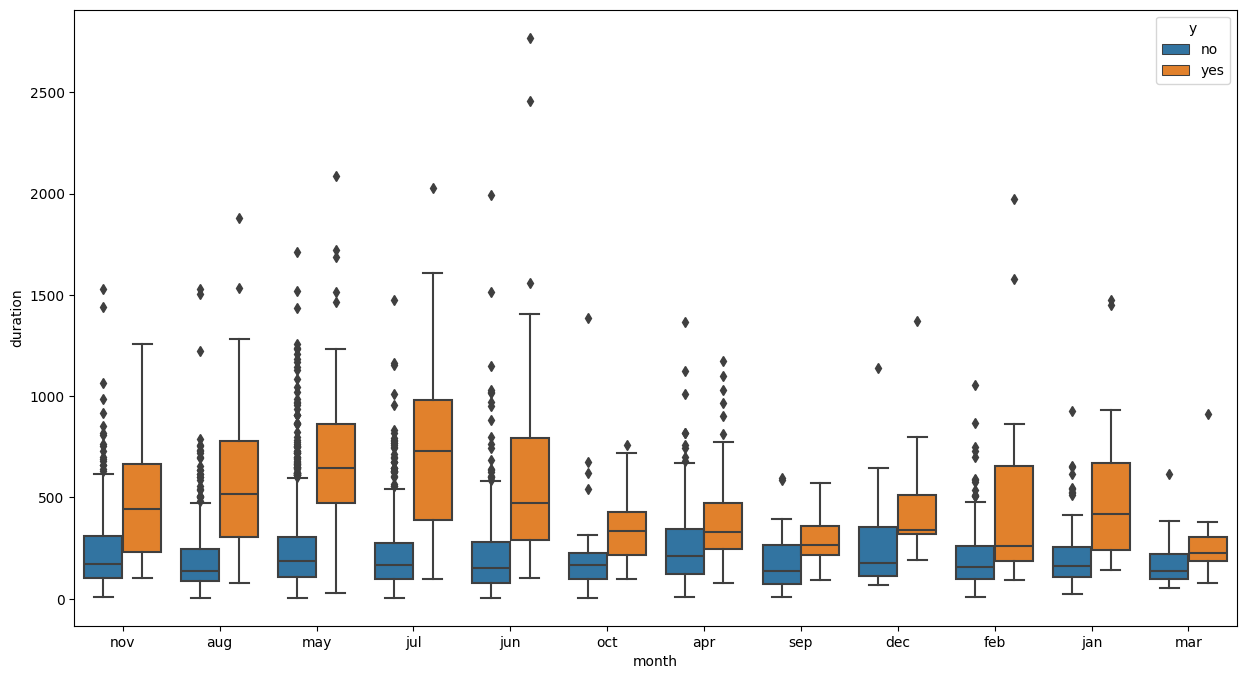

In [77]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data= bank_data_df, x = "month", y = "duration", hue= "y")